In [167]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from tqdm import tqdm
import time

from modules.b import template_matching

In [168]:
img = cv2.imread("samples/C001H001S0001003001.bmp", 0)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [169]:
mask = np.ones_like(img, dtype=int)
r_list = []

In [170]:
def is_same(ij, r):
    for a in range(-5, 6):
        for b in range(-5, 6):
            if (ij[0]+a, ij[1]+b) in r:
                return True
    return False

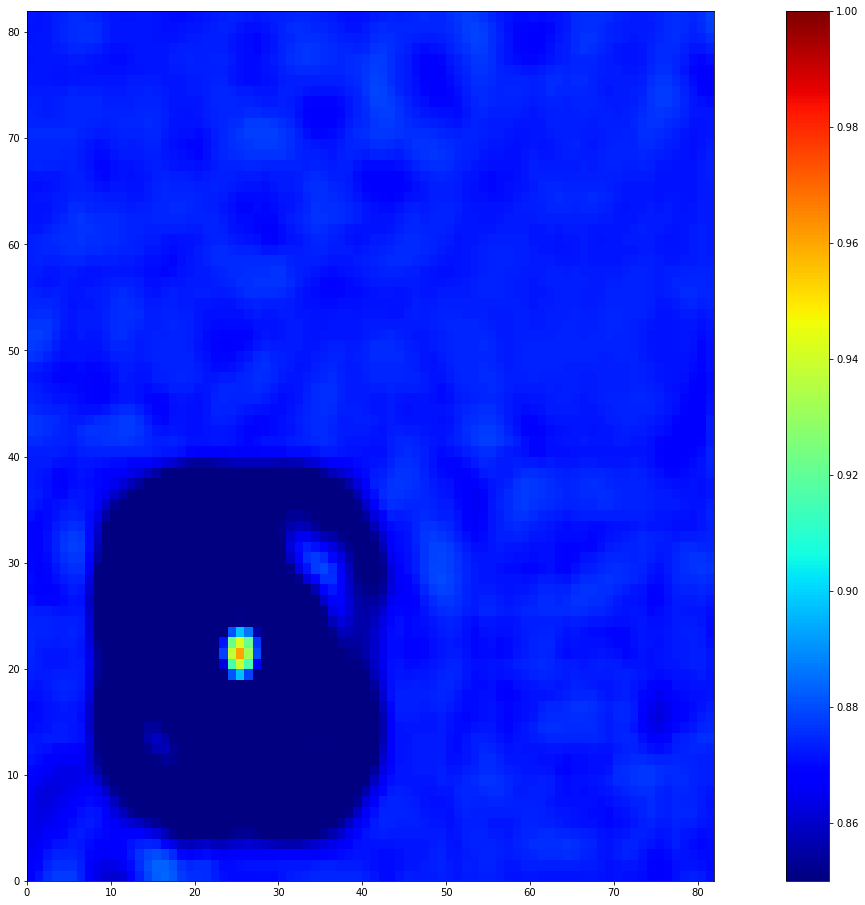

In [171]:
tracer_img = cv2.imread(f"tracer_imgs_light/tracer_1.bmp", 0)
# tracer_img_rgb = cv2.cvtColor(tracer_img, cv2.COLOR_BGR2RGB)

res = cv2.matchTemplate(img[400:501, 500:601], tracer_img, cv2.TM_CCORR_NORMED)

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
p = ax.pcolor(res, cmap=plt.cm.jet, norm=Normalize(vmin=0.85, vmax=1.0))
pp = plt.colorbar(p, ax=ax, pad=0.08, orientation='vertical')
plt.show()

In [172]:
start = time.time()

In [173]:
def template_matching_py(f, g, m):
    # get array size
    f_M = f.shape[0]
    f_N = f.shape[1]
    g_M = g.shape[0]
    g_N = g.shape[1]

    # set result array
    g_m = int(g_M / 2)
    g_n = int(g_N / 2)

    h_M = f_M - 2 * g_m + 1
    h_N = f_N - 2 * g_n + 1
    h = np.zeros([h_M, h_N])

    for x in tqdm(range(f_M)):
        for y in range(f_N):
            if m[x, y] == 0:
                h[x, y] = 0.0
            else:
                value1 = 0
                value2 = 0
                value3 = 0

                for s in range(g_M):
                    for t in range(g_N):
                        ss = x - g_m + s
                        tt = y - g_n + t

                        if 0 <= ss < g_M and 0 <= tt < g_N:
                            value1 += g[s, t] * f[ss, tt]
                            value2 += f[ss, tt] * f[ss, tt]
                            value3 += g[s, t] * g[s,t]

                h[x, y] = value1 / np.sqrt(value2 * value3)

    return h


for t in tqdm(range(1)):
    tracer_img = cv2.imread(f"tracer_imgs_light/tracer_{t}.bmp", 0)
    # tracer_img_rgb = cv2.cvtColor(tracer_img, cv2.COLOR_BGR2RGB)

    res2 = template_matching_py(f=img[400:501, 500:601].astype(int), g=tracer_img.astype(int), m=mask)

    print(res.size)

    mask = cv2.copyMakeBorder(np.where(res > 0.85, 1, 0), 9, 10, 9, 10, cv2.BORDER_CONSTANT, 0).astype(np.uint8)
    res_th_96_j, res_th_96_i = np.where(res > 0.96)

    for n in range(len(res_th_96_i)):
        i, j = res_th_96_i[n], res_th_96_j[n]
        if is_same((i, j), r_list):
            continue
        cv2.rectangle(img_rgb, (i, j), (i+20, j+20), (255, 0, 0), 1)
        r_list.append((i, j))

  0%|          | 0/1 [00:00<?, ?it/s]


IndexError: index 82 is out of bounds for axis 1 with size 82

In [ ]:
t = time.time() - start
print(t)

In [ ]:
plt.figure(figsize=(16, 16))
plt.imshow(img_rgb)
plt.show()

In [ ]:
np.savetxt("test.csv", r_list, delimiter=',', fmt="%d", header="(i, j) of upper left coordinates.")